# Deep Video Analytics client using REST API endpoint

In [1]:
import sys
sys.path.append('../')
import client
import logging
from IPython.display import Image, display

## List objects

In [2]:
ctx = client.DVAContext(token="96c3f754322c6fa7da724d14ef475cdd1f382189")

In [3]:
for v in ctx.list_videos():
    print "{name} with ID: {vid}".format(name=v['name'],vid=v['id'])

exampledataset with ID: 2
crnn_test with ID: 3
citest with ID: 1


In [4]:
for v in ctx.list_models():
    print v['name']

coco
textbox
face
inception
facenet
crnn
tagger


## Process a video

In [ ]:
video_processing_query = client.ProcessVideoURL(name="test",url="https://www.youtube.com/watch?v=ashLaclKCik")
video_processing_query.execute(ctx)

##### Optionally you can "wait" on it to complete,

In [ ]:
video_processing_query.wait()

## Finding similar images

### Get inception retriever for similarity search

In [ ]:
retrievers = {r['name']:r for r in ctx.list_retrievers()}
print retrievers['inception']

#### Query image

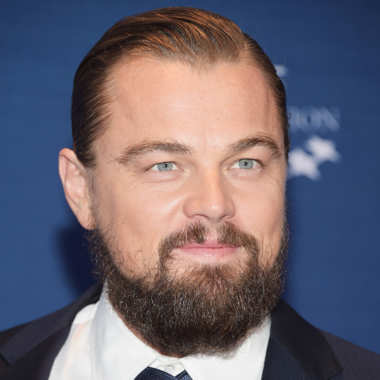

In [17]:
leo_query_image = '../notebooks/figures/leo.jpg'
display(Image(leo_query_image,width=300))

### Lets make a request using inception retriever and inception indexer

In [7]:
q = client.FindSimilarImages(leo_query_image,retriever_pk=retrievers['inception']['id'])
q.execute(context=ctx)

In [13]:
res = {t['id']:sorted([(r['rank'],ctx.get_frame(r['frame'])['media_url'],r) for r in t['query_results']]) for t in q.results['tasks'] if t['query_results']}

Rank 1


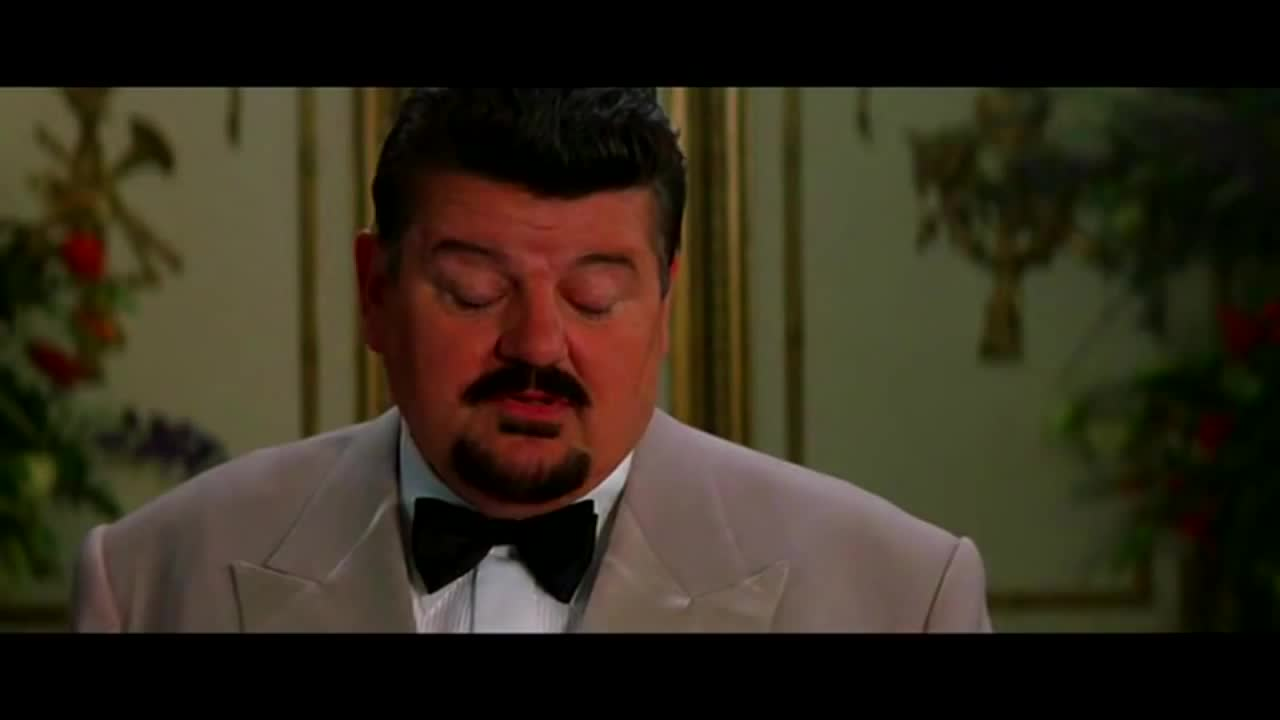

Rank 2


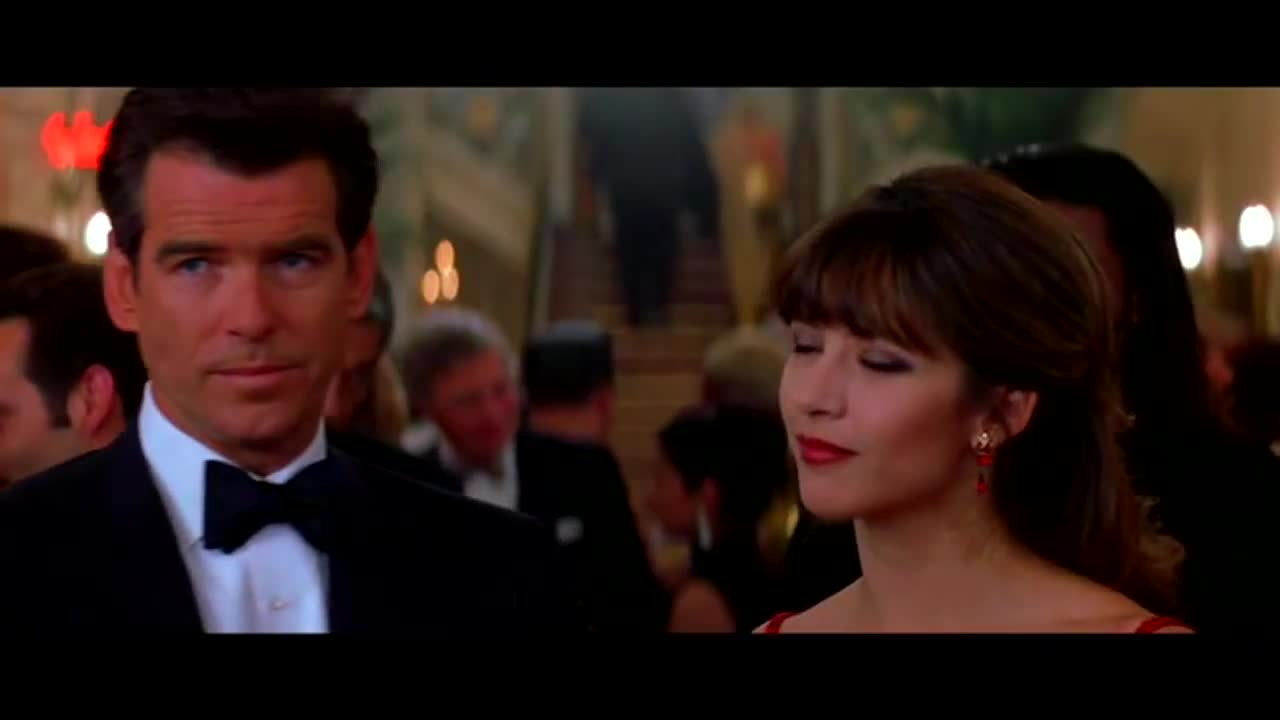

Rank 3


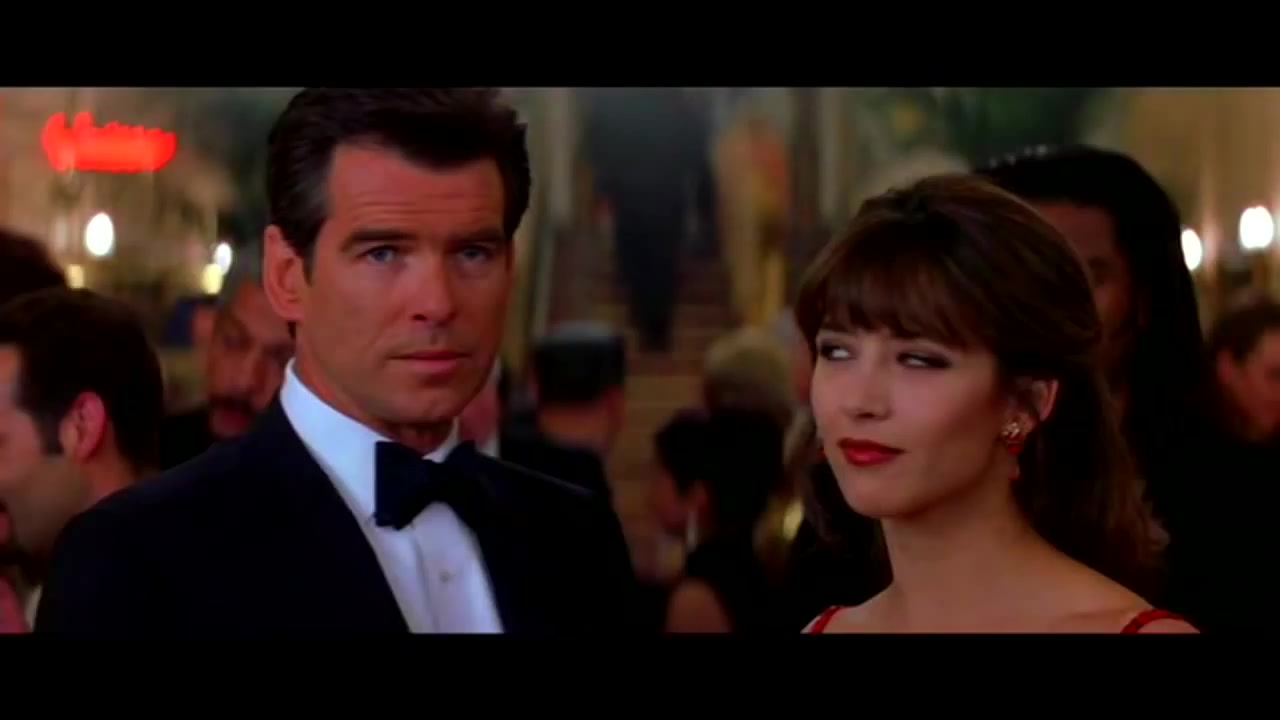

Rank 4


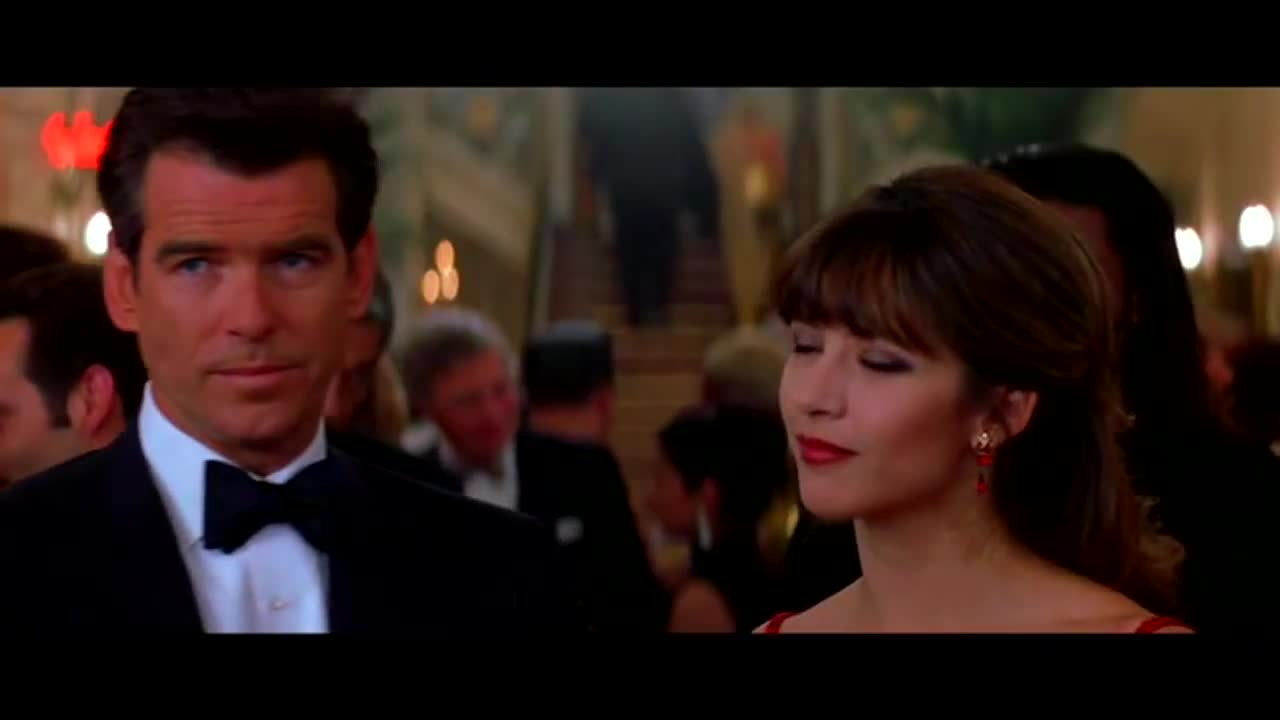

Rank 5


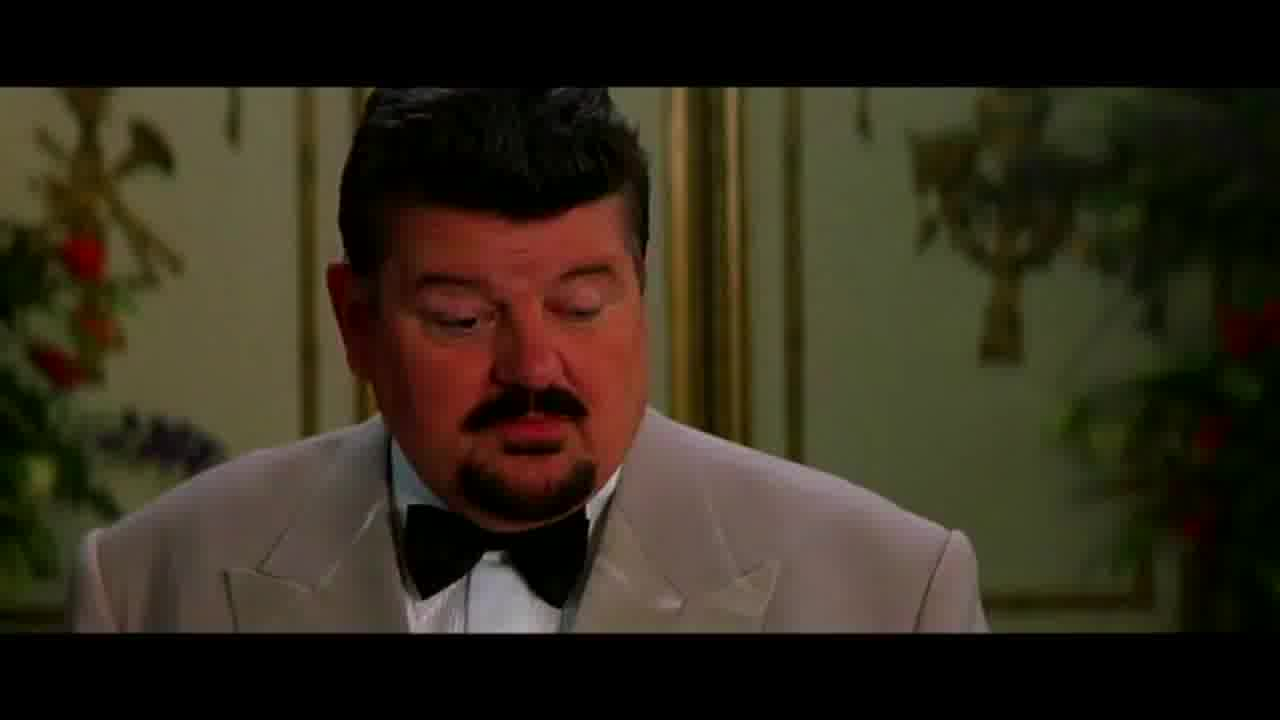

Rank 6


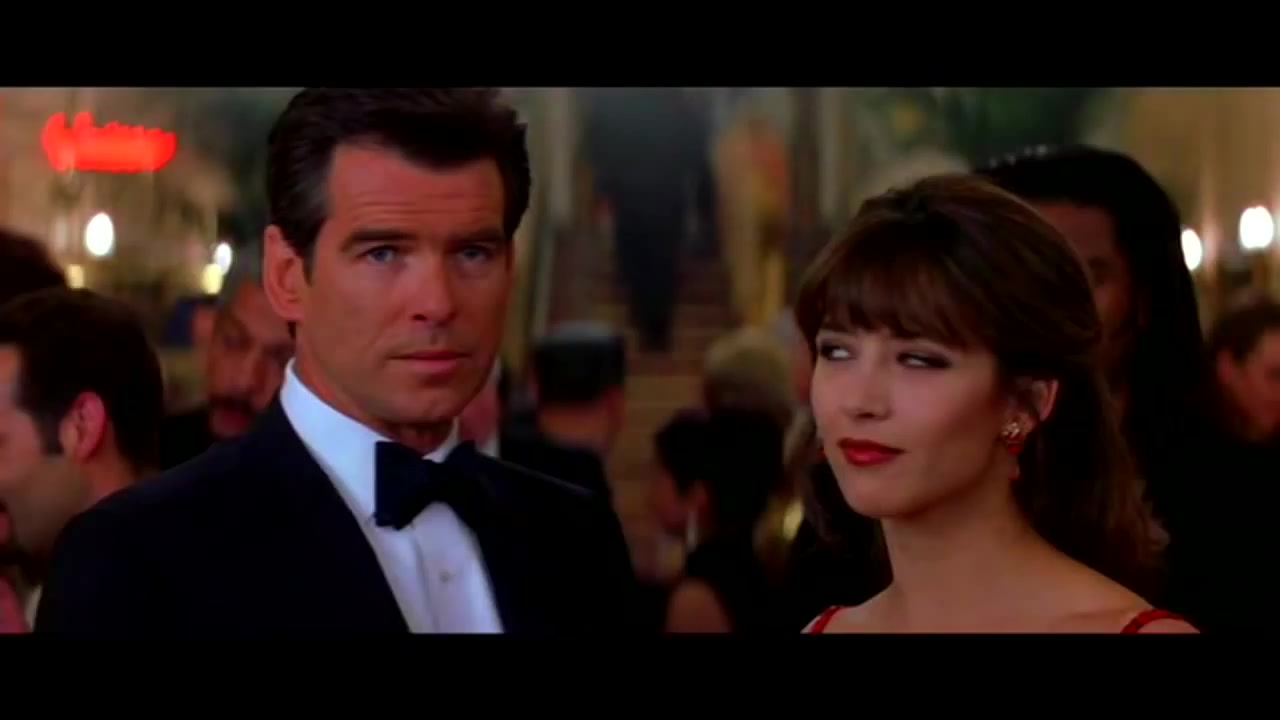

Rank 7


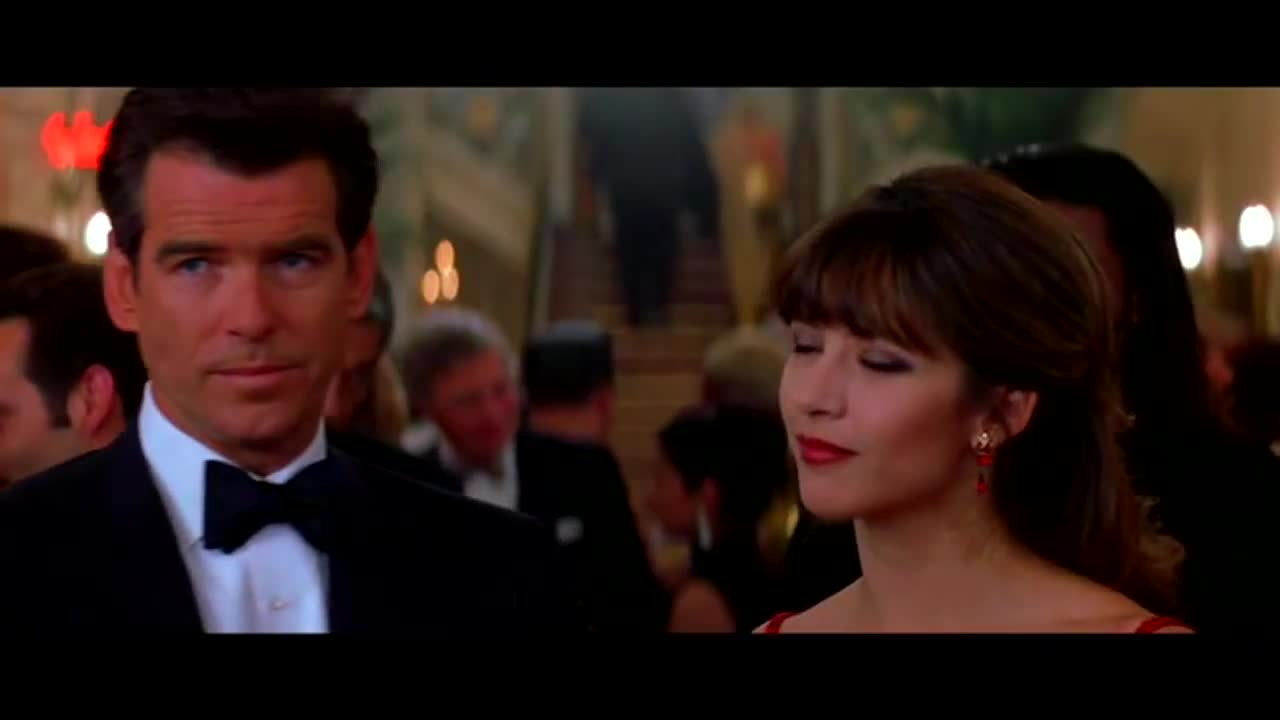

Rank 8


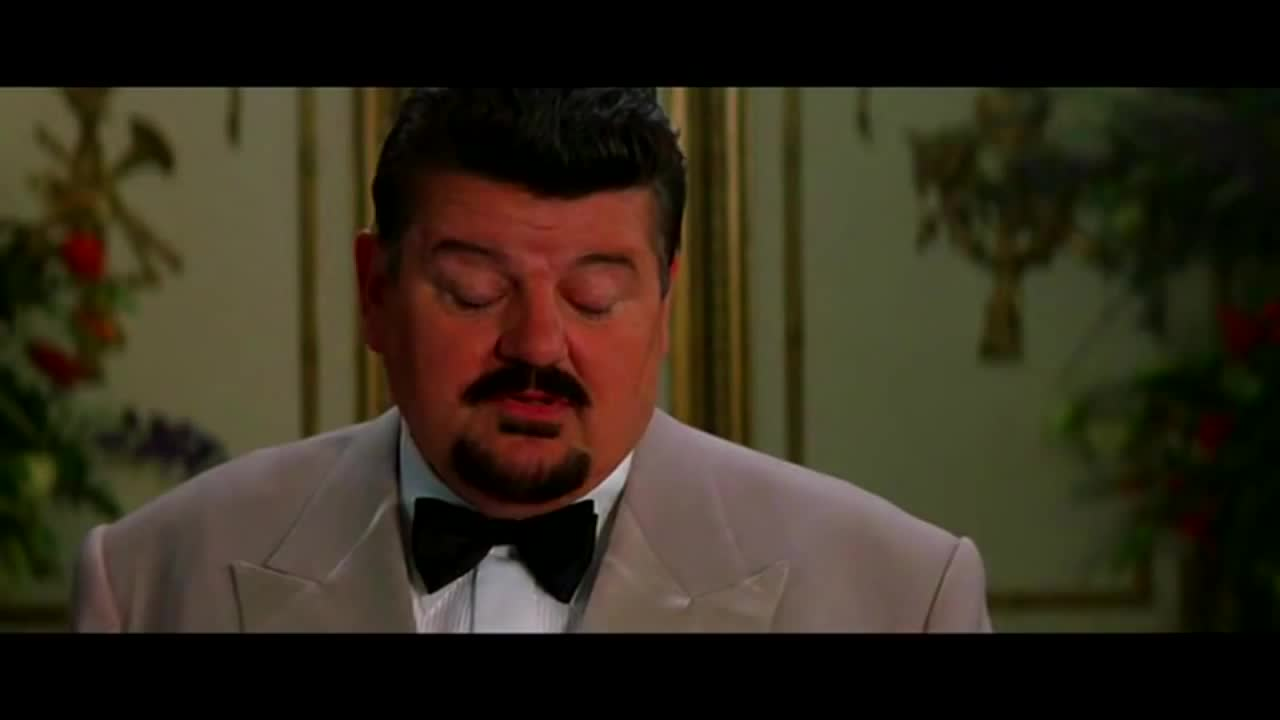

Rank 9


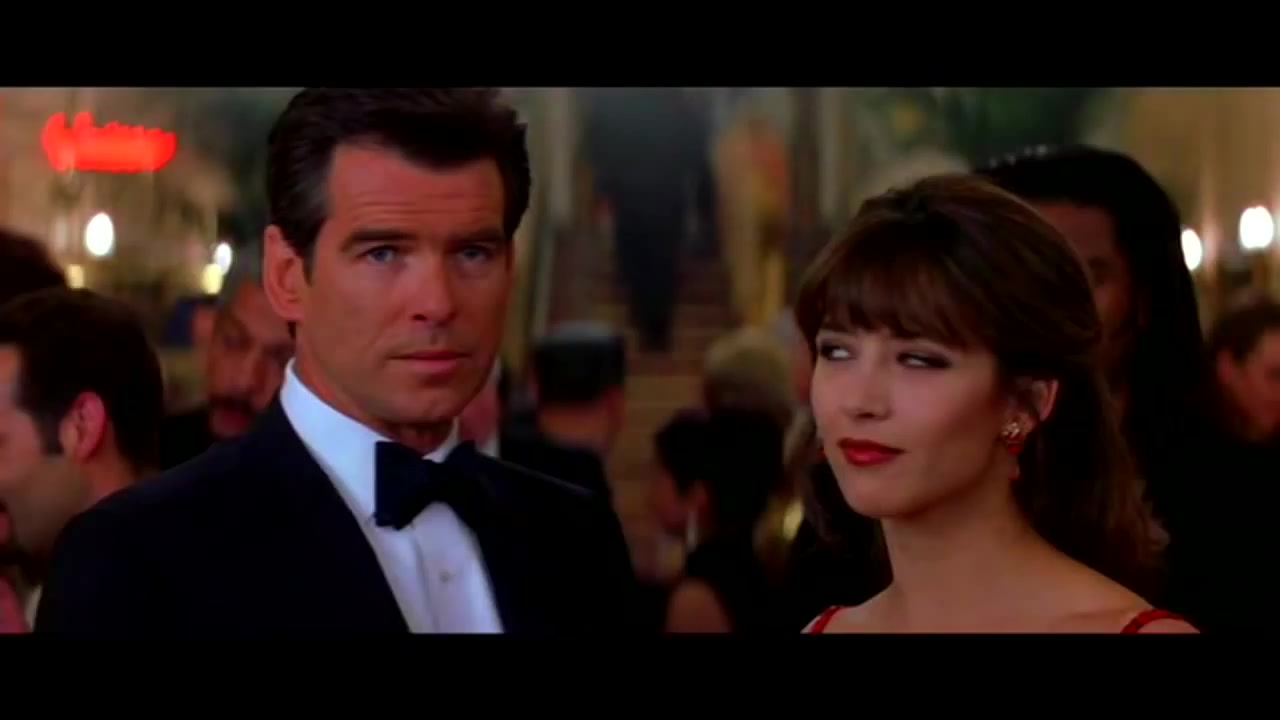

Rank 10


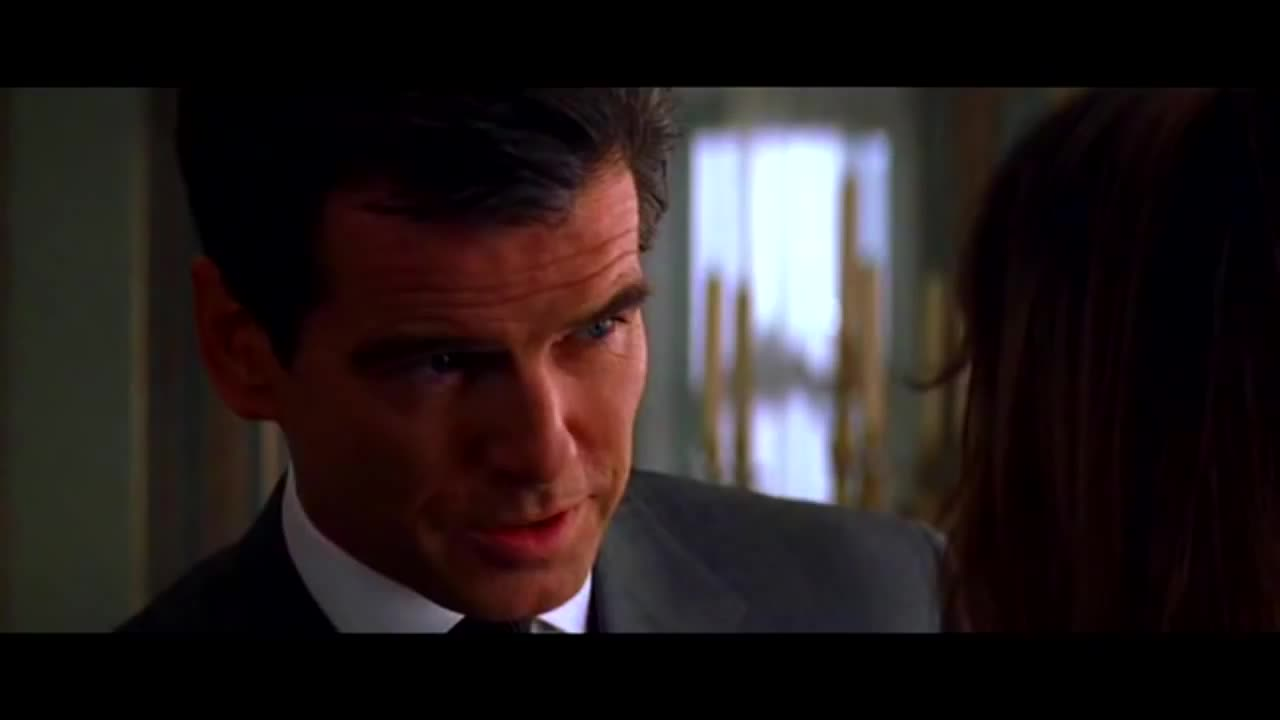

Rank 11


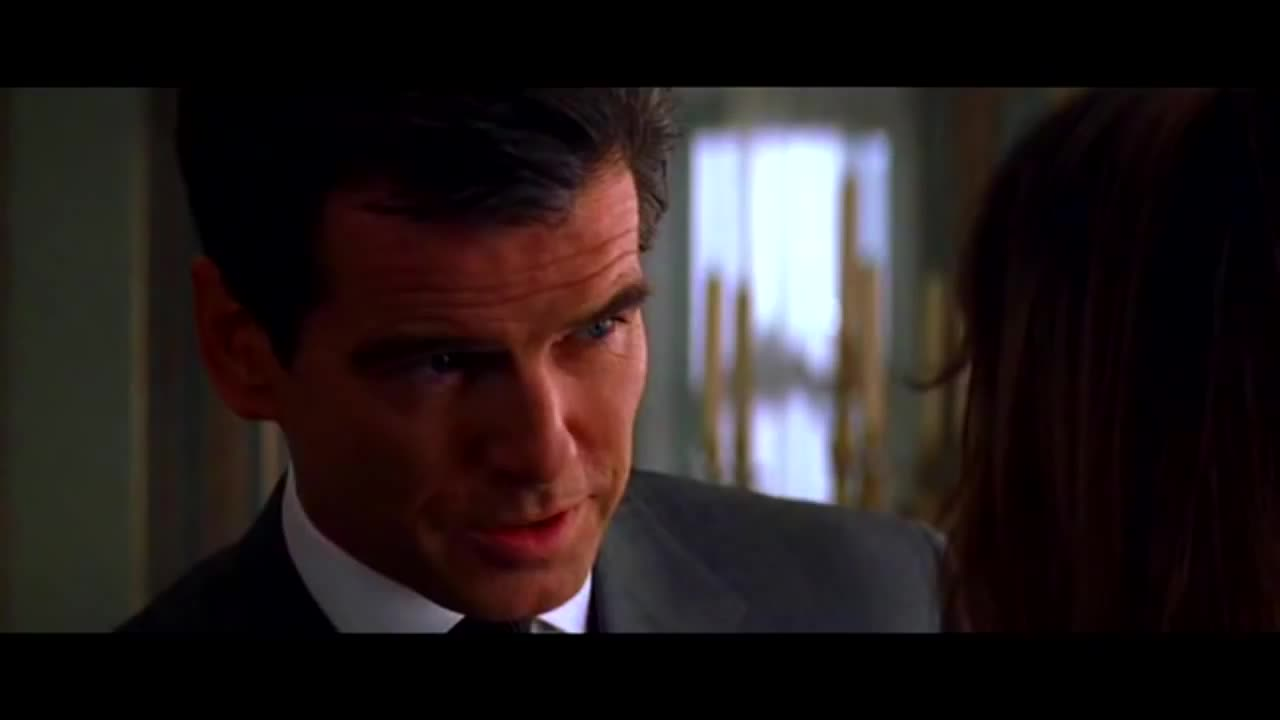

Rank 12


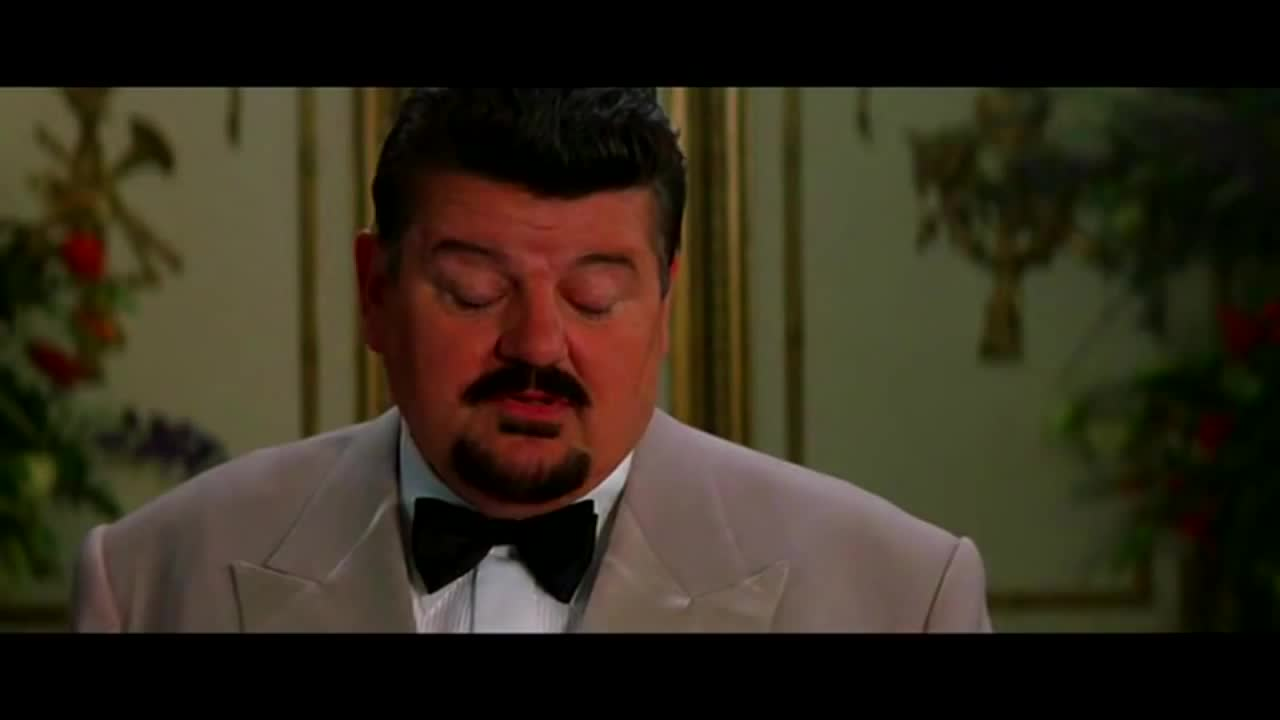

Rank 13


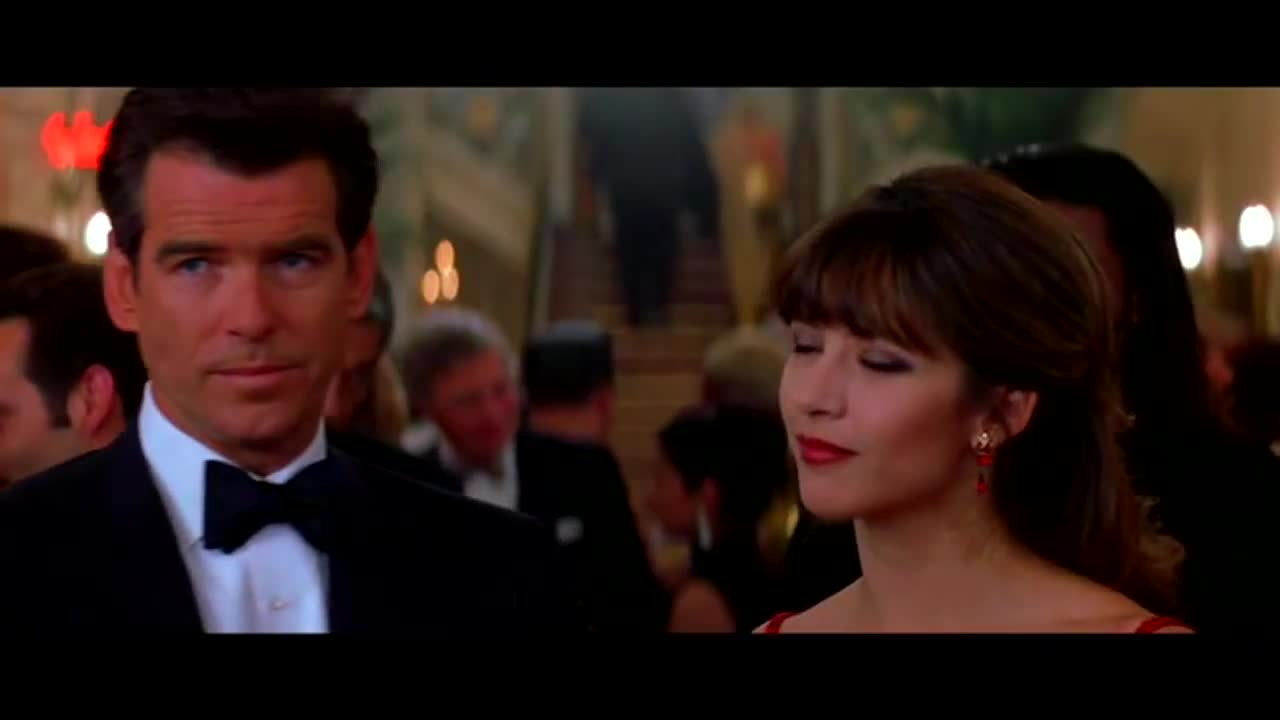

Rank 14


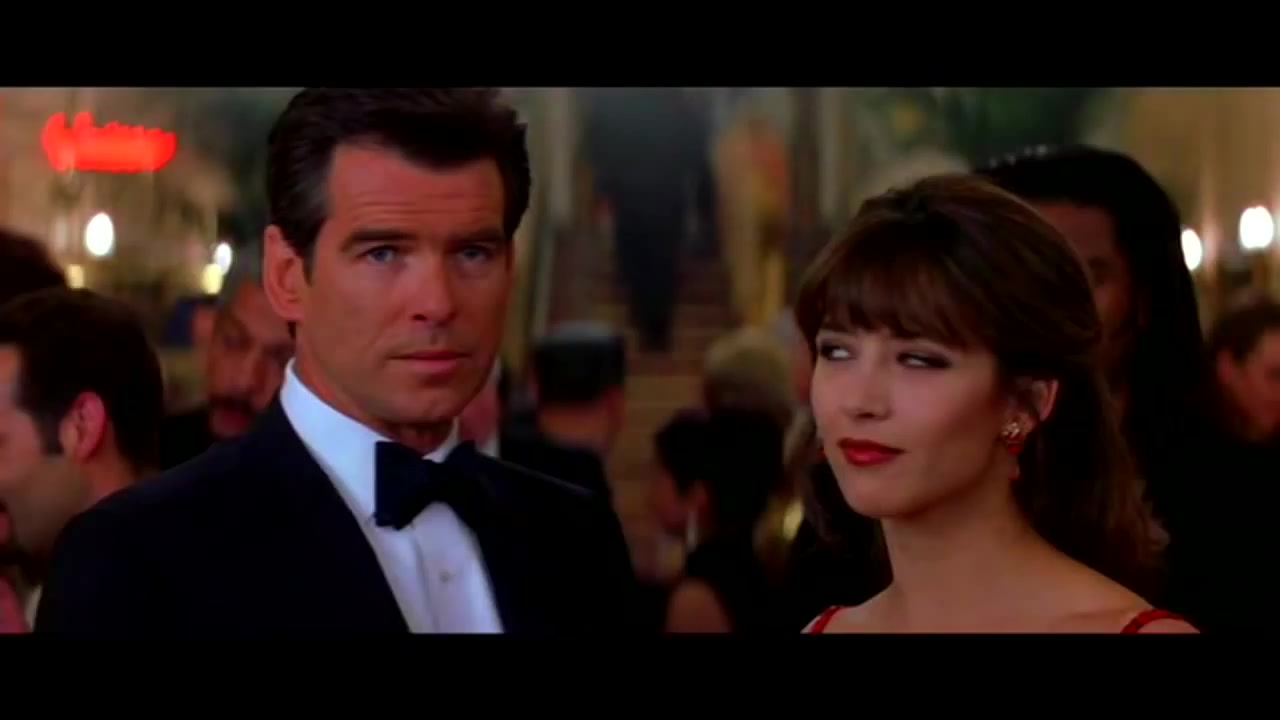

Rank 15


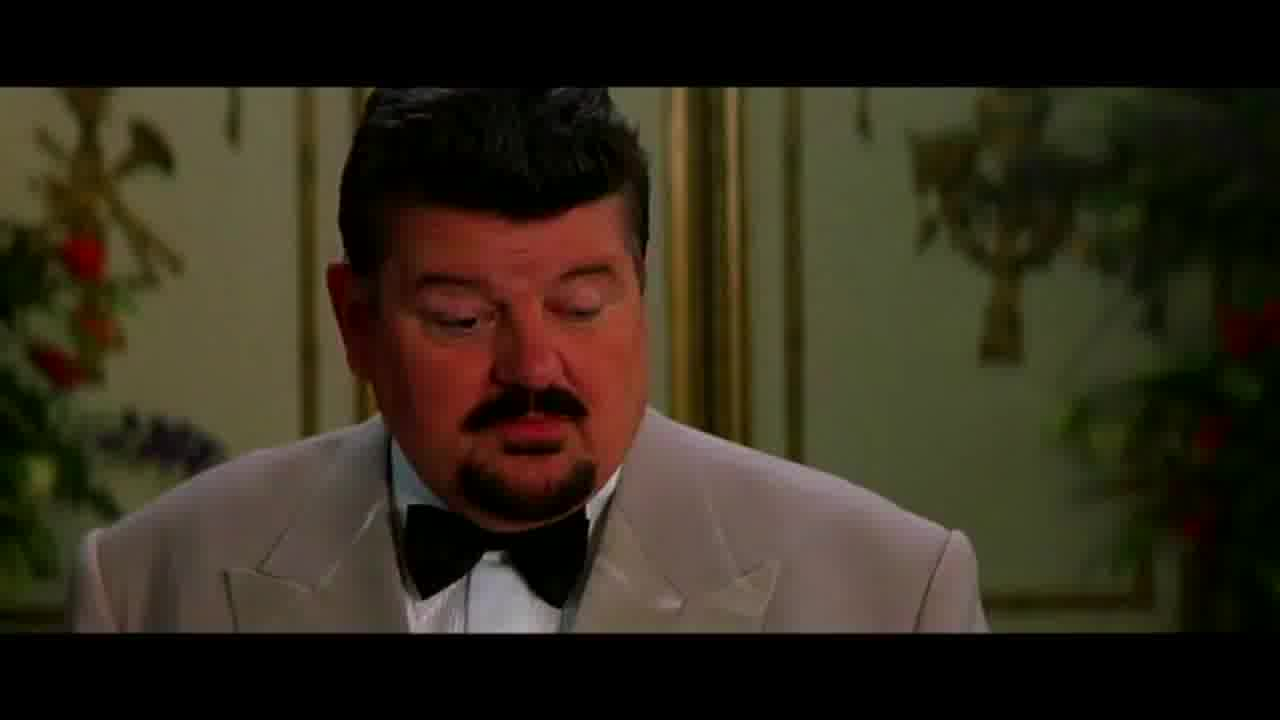

Rank 16


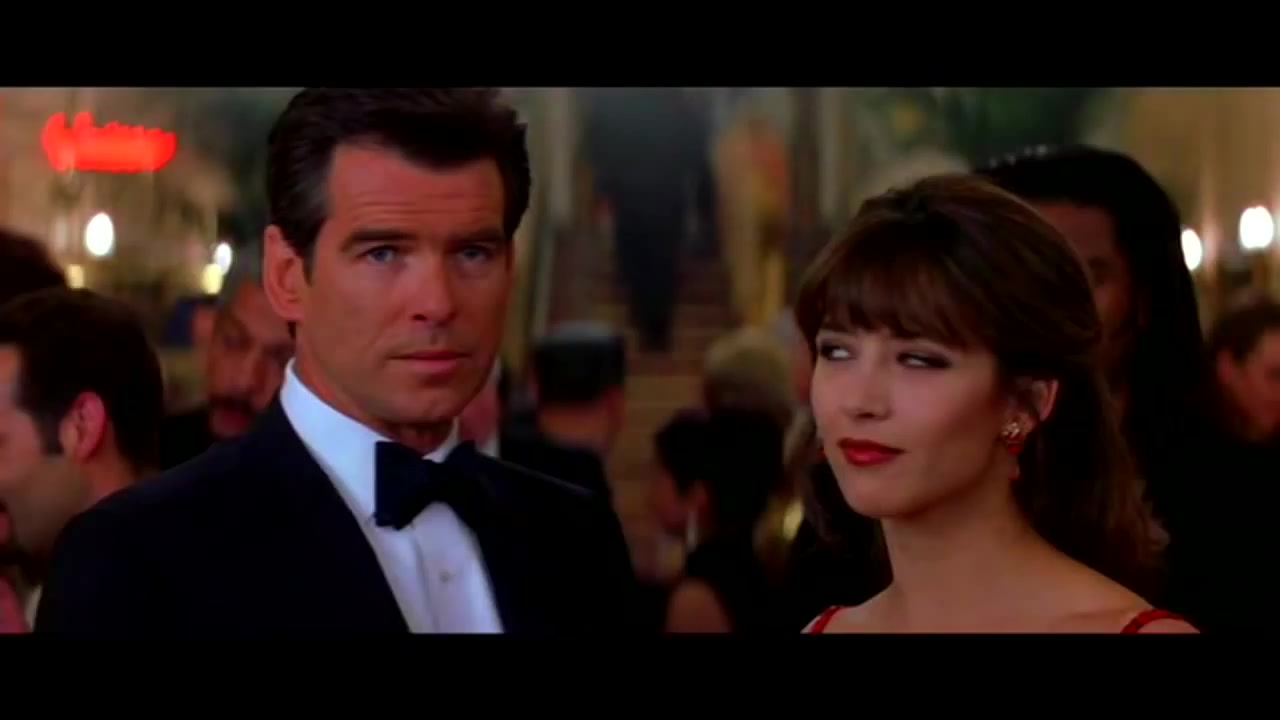

Rank 17


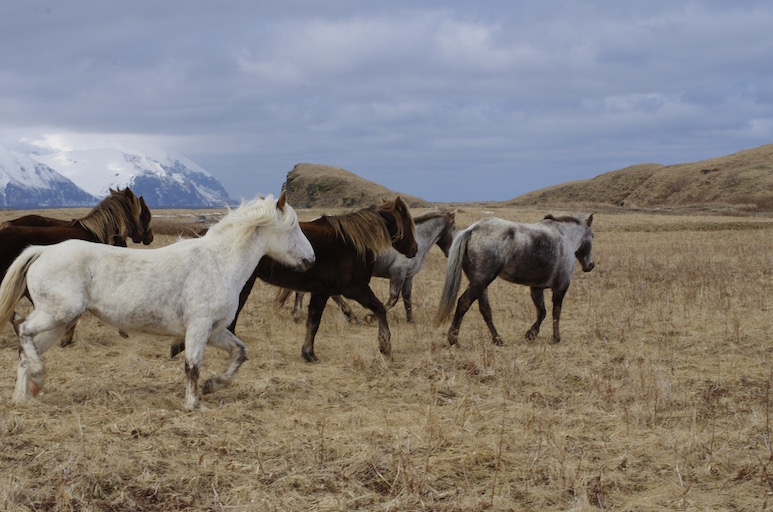

Rank 18


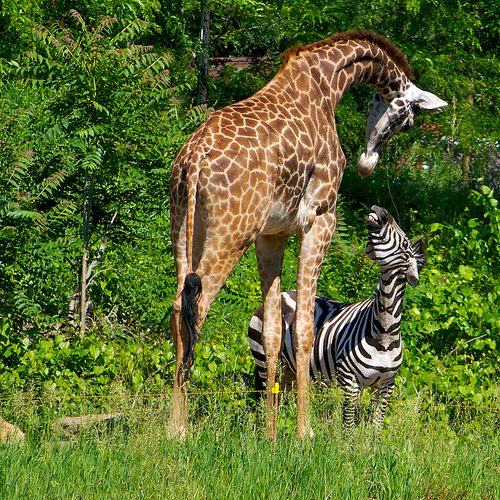

Rank 19


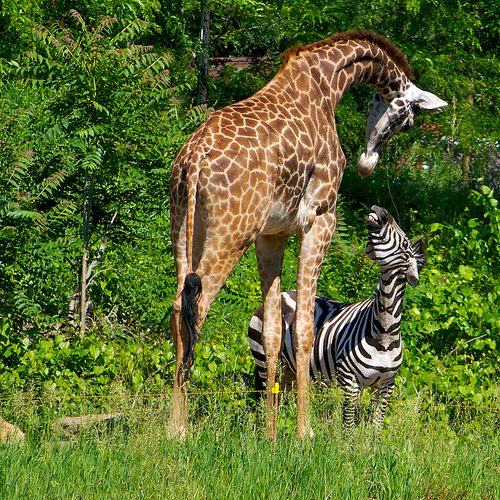

Rank 20


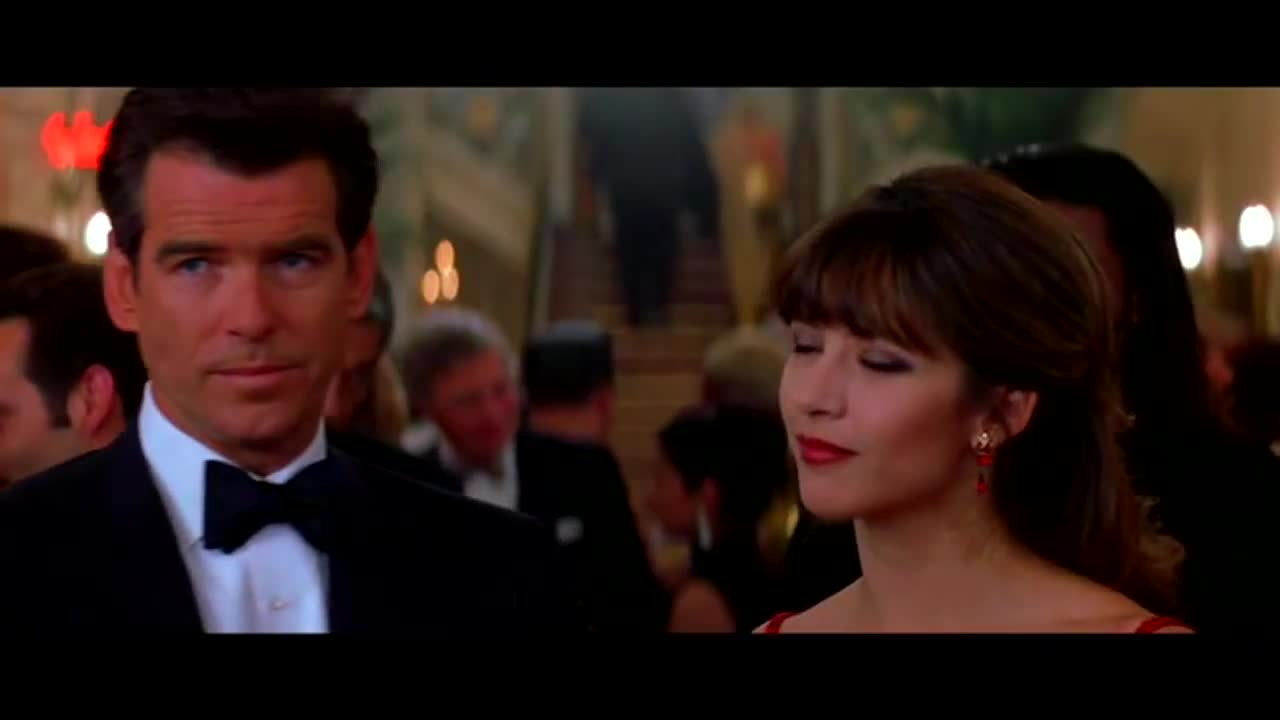

In [15]:
display(Image(url,width=100))

for _, rs in res.iteritems():
    for rank,url,entry in rs:
        print "Rank {}".format(rank)
        display(Image(url,width=300))        

In [9]:
f = 
print f

{u'subdir': u'', u'frame_index': 60, u'url': u'http://localhost:8000/api/frames/14/', u'h': 720, u'name': None, u'keyframe': False, u't': 1.409033, u'w': 1280, u'segment_index': 0, u'video': u'http://localhost:8000/api/videos/1/', u'id': 14, u'media_url': u'http://aub3dvatest2013nbas1.s3-website-us-east-1.amazonaws.com/1/frames/60.jpg'}
